In [1]:
import pandas as pd
actual = pd.read_csv("/kaggle/input/data-files/test_data_24.csv")
generated = pd.read_csv("/kaggle/input/data-files/gen_data_24.csv")

In [4]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.13.1 pandapower==2.14.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 27.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 36.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:

import numpy as np
import pandas as pd
from scipy.stats import entropy
import pandapower as pp
net = pp.networks.case24_ieee_rts()


Detected 24 buses based on column naming (P1...P24).

Converted per-unit values to actual units (MW / Mvar / kV / degrees)


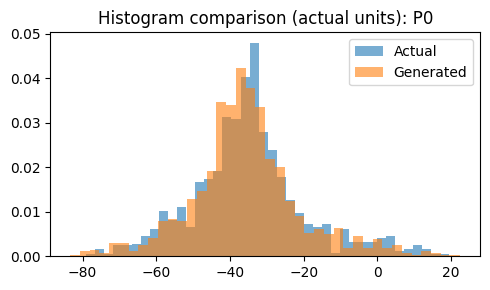

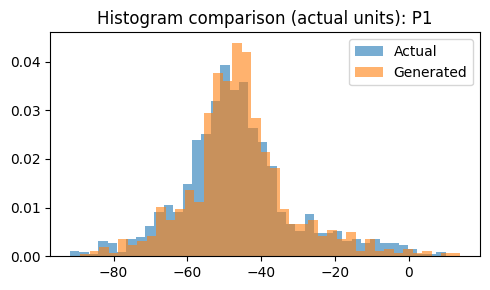

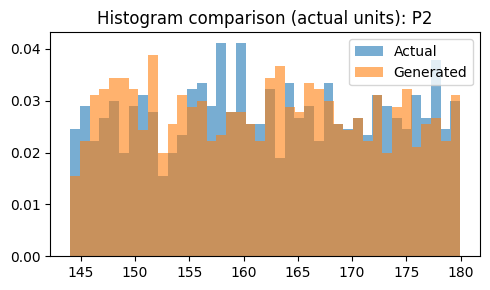

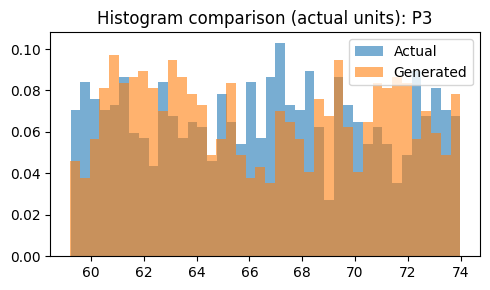

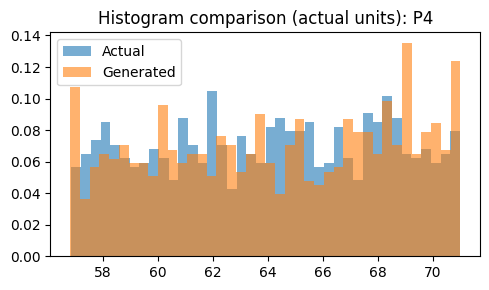

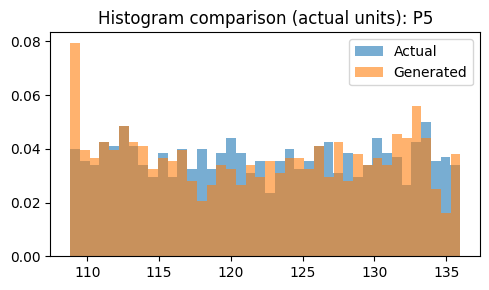

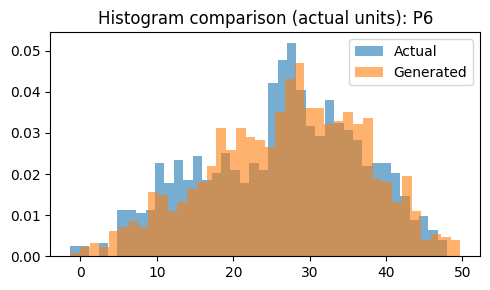

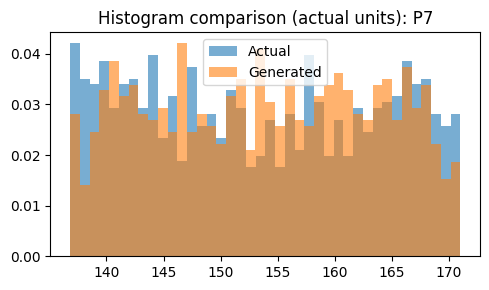

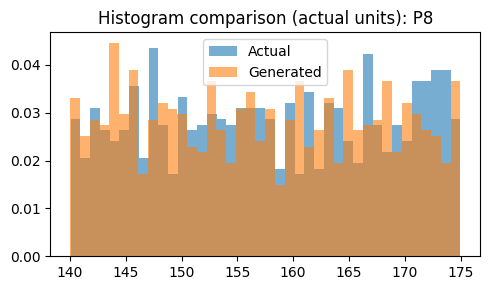

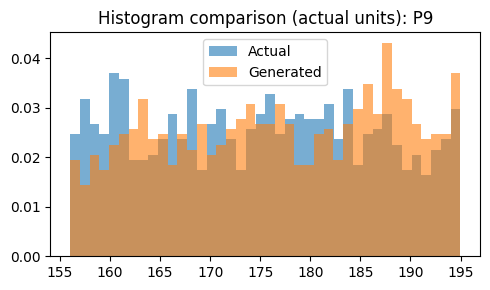

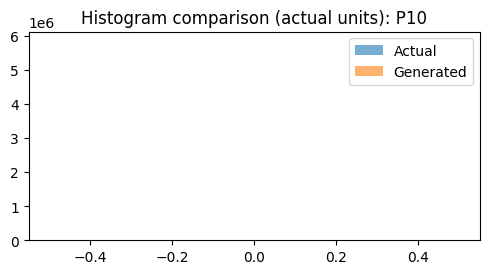

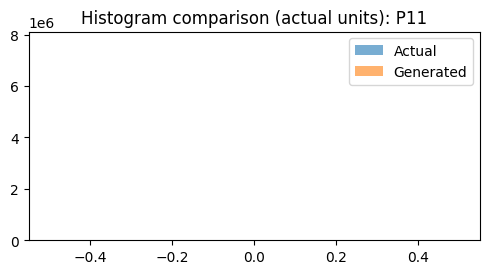

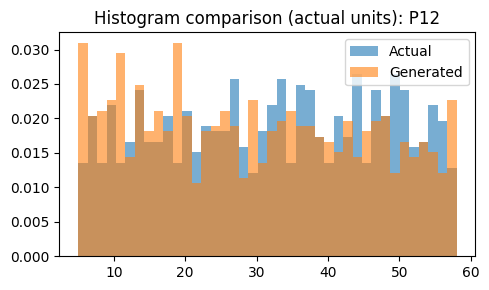

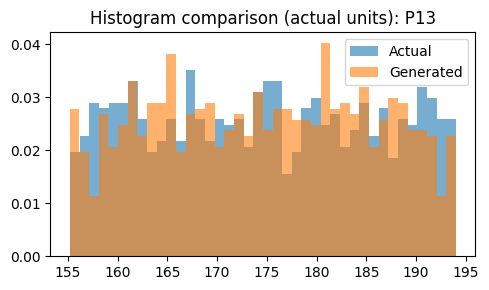

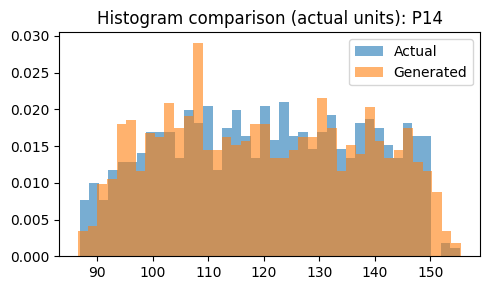

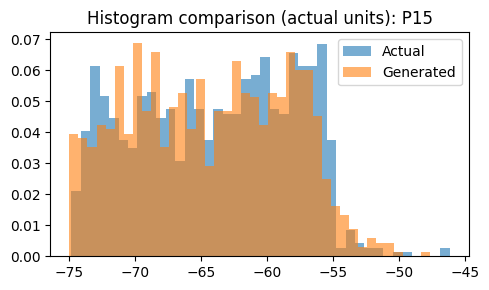

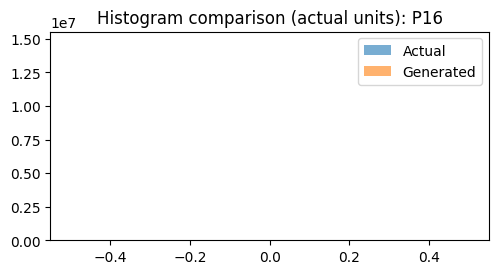

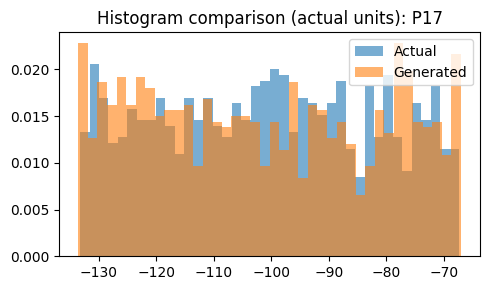

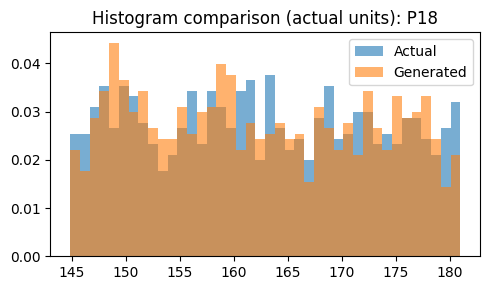

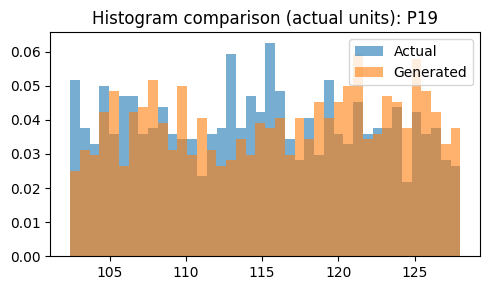

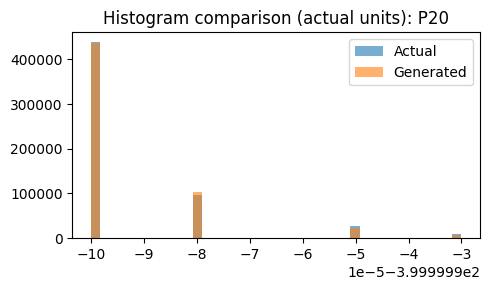

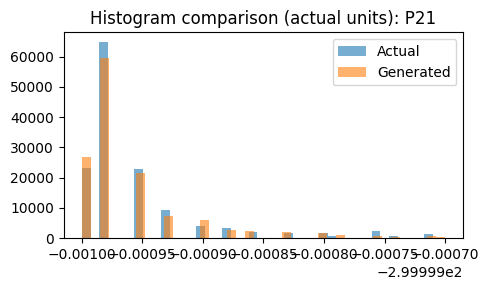

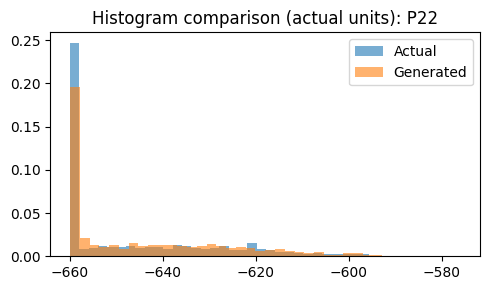

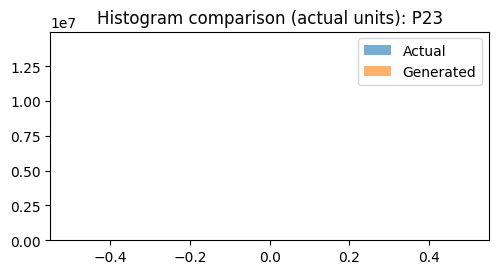

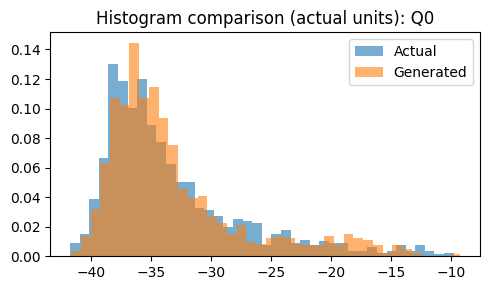

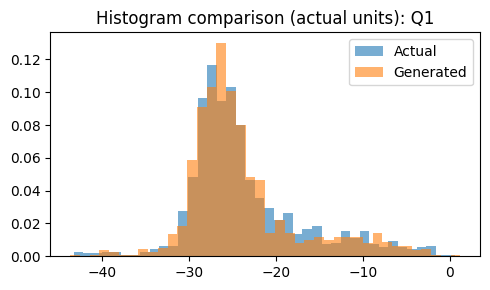

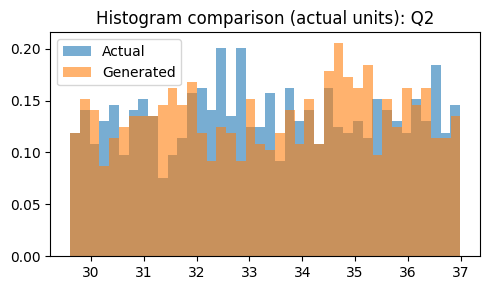

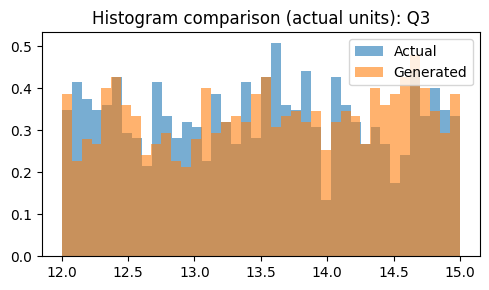

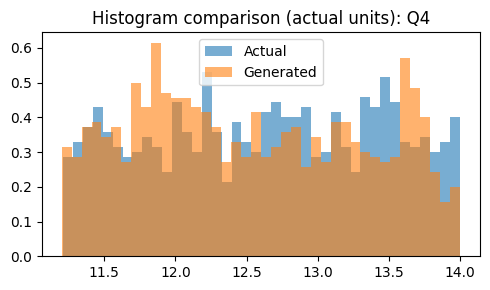

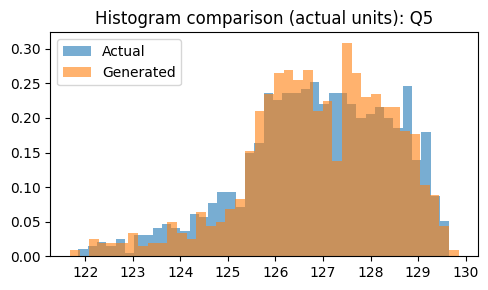

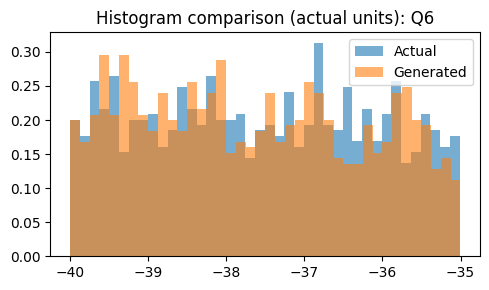

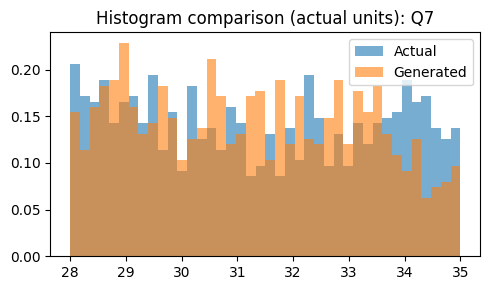

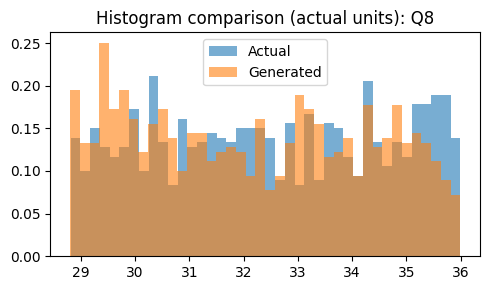

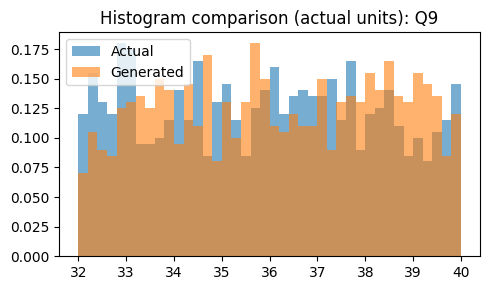

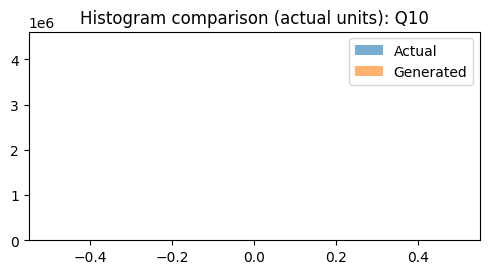

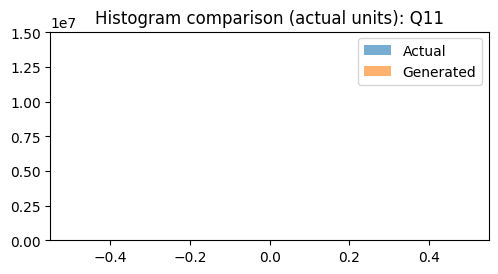

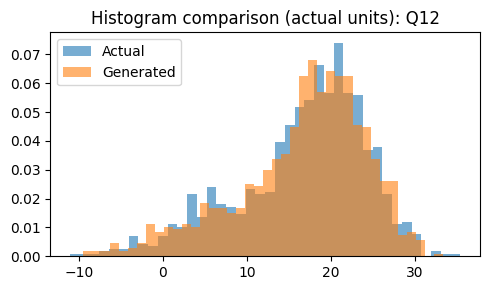

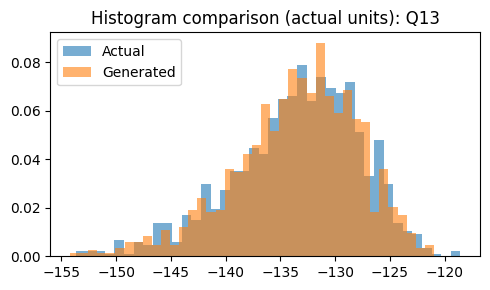

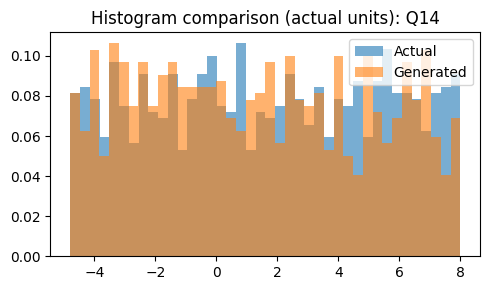

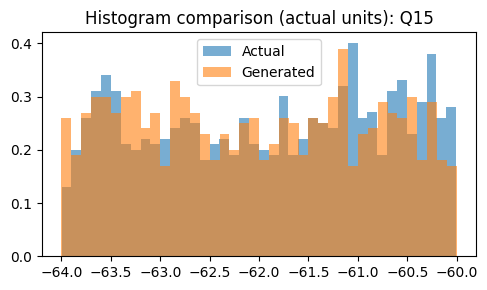

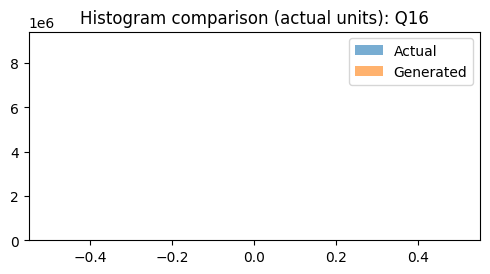

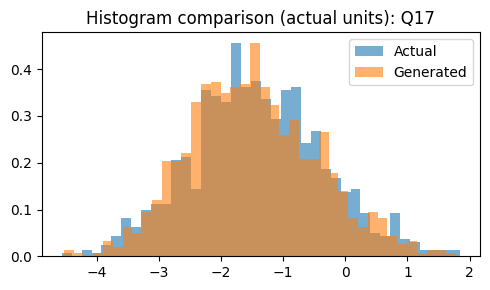

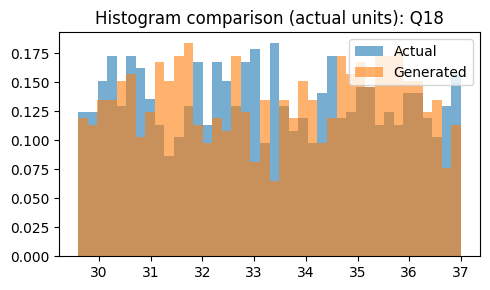

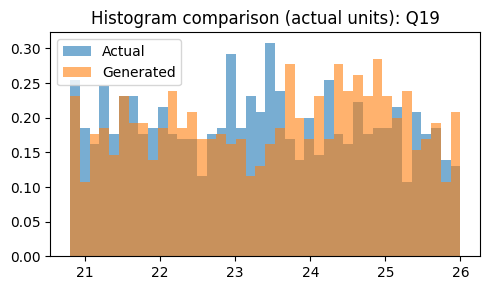

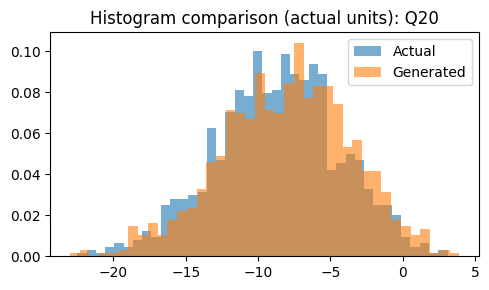

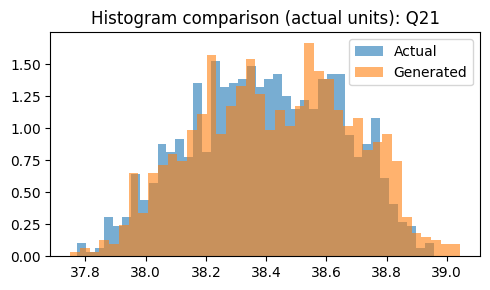

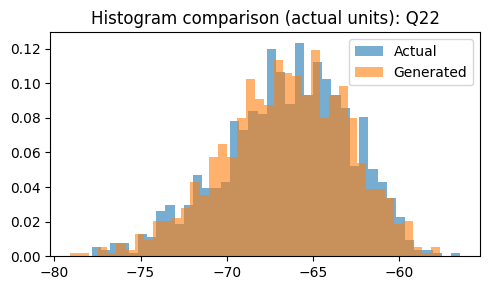

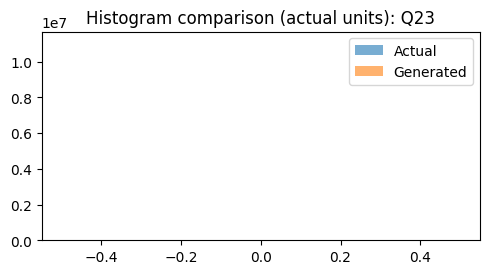

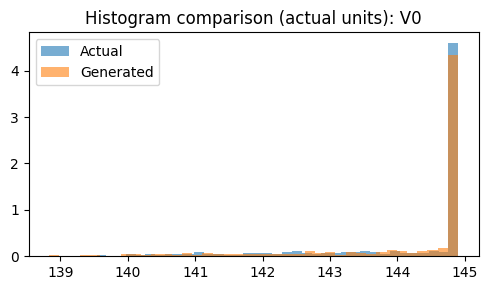

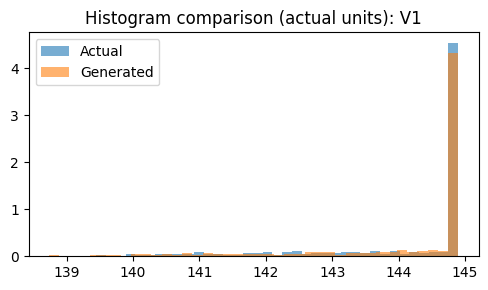

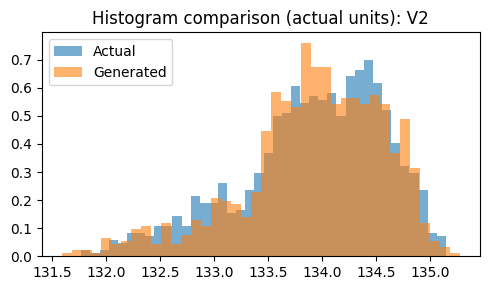

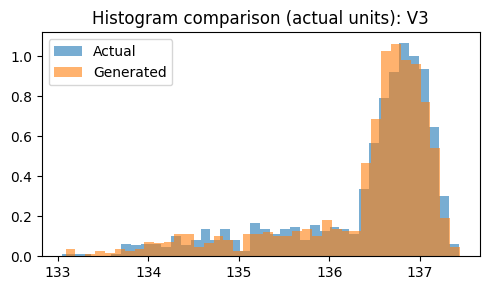

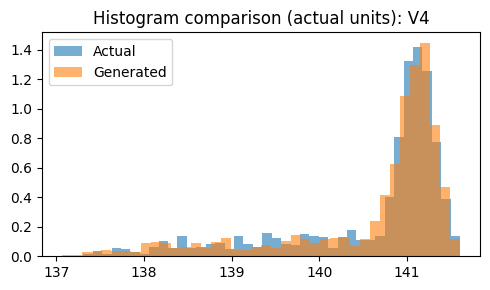

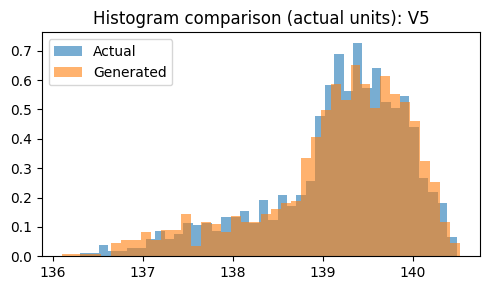

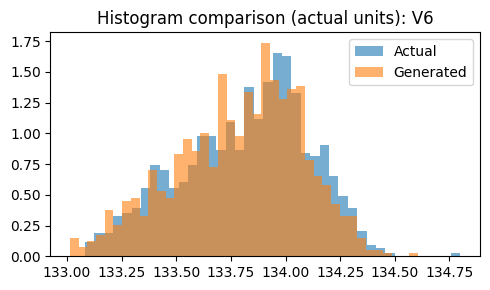

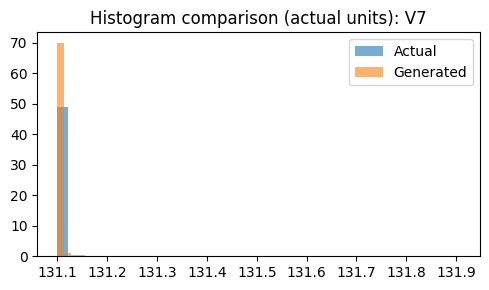

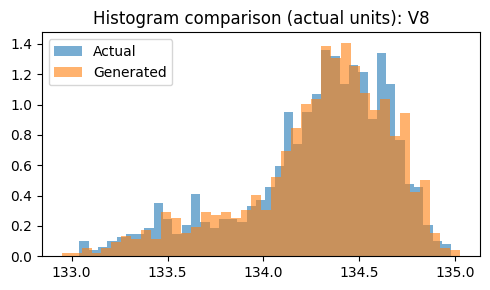

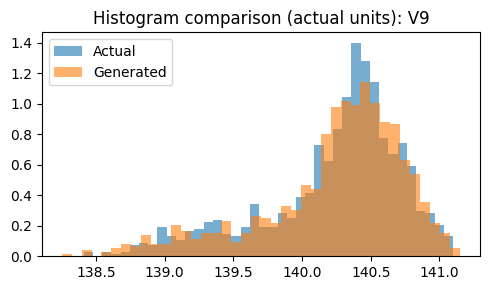

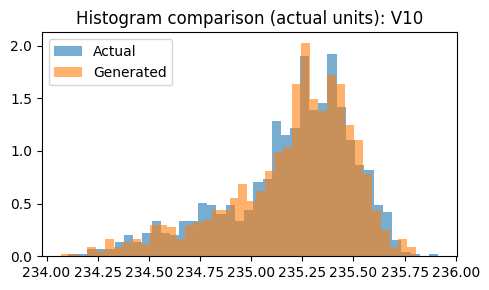

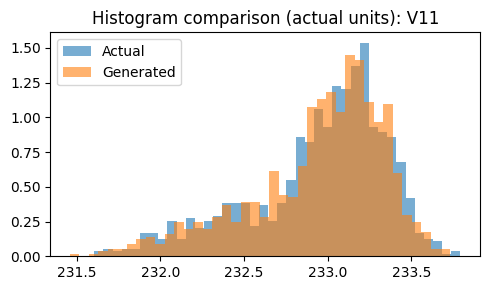

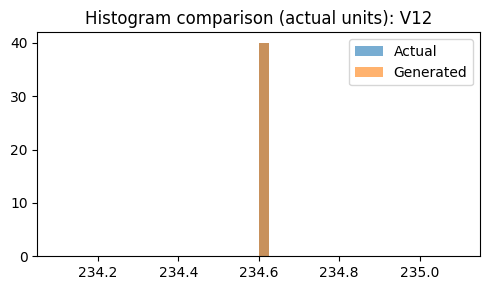

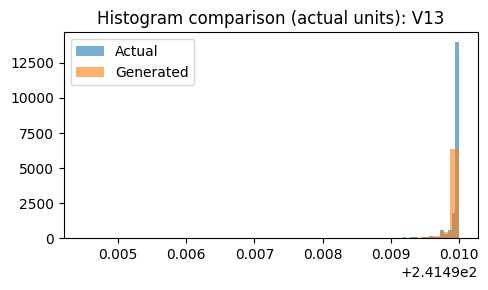

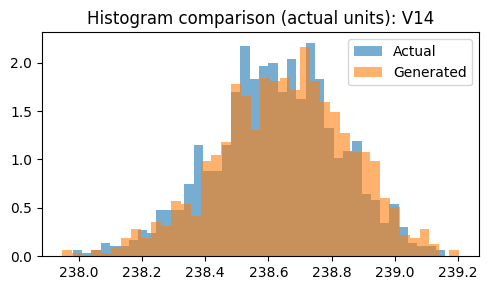

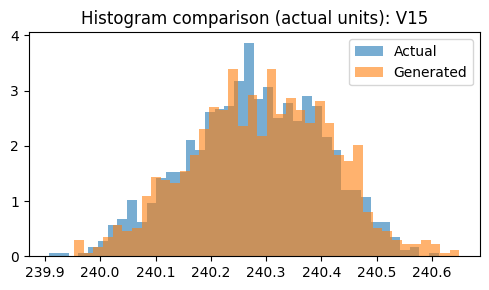

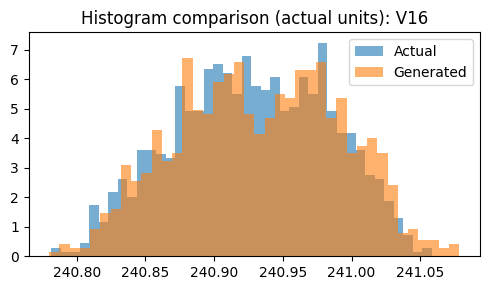

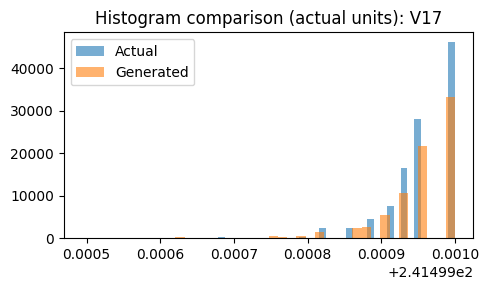

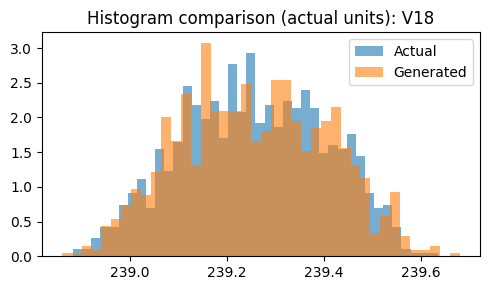

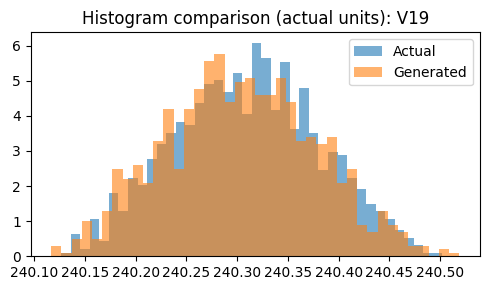

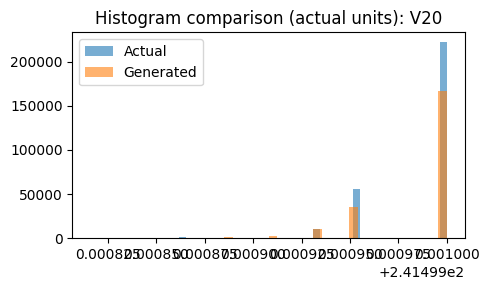

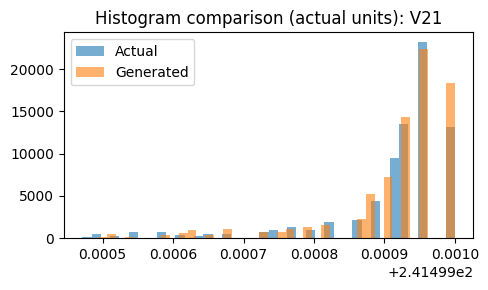

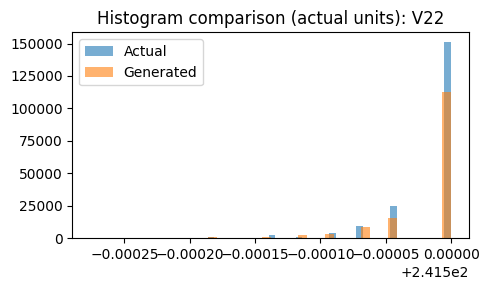

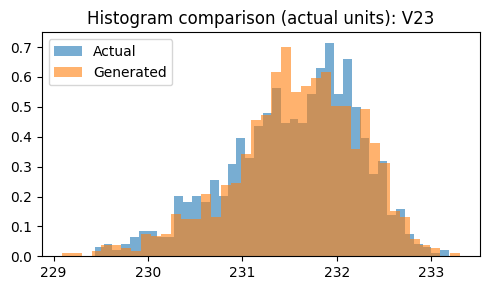

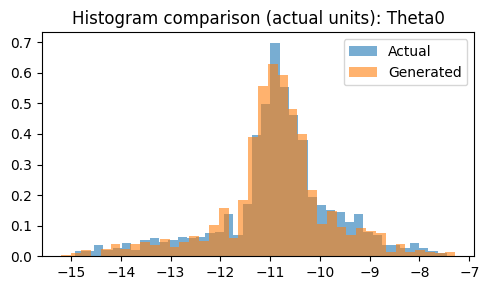

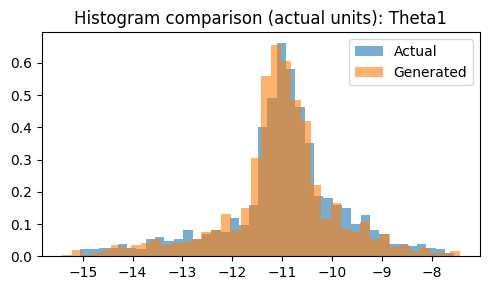

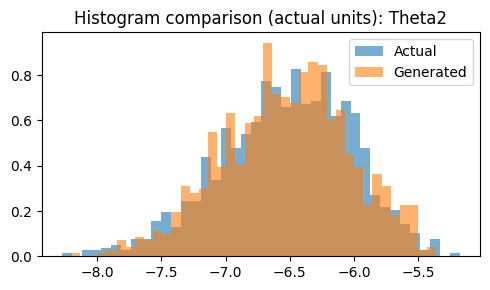

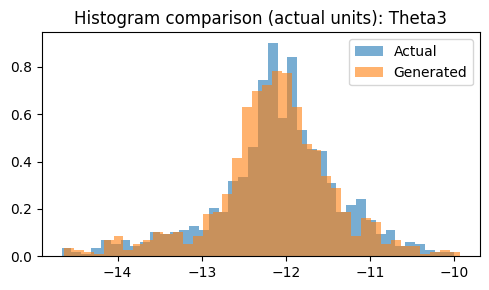

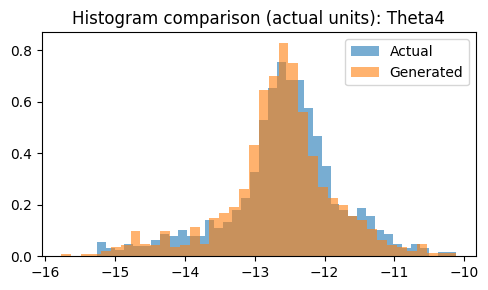

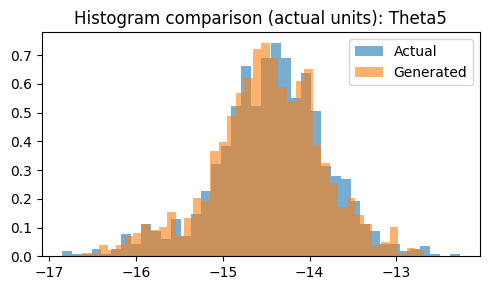

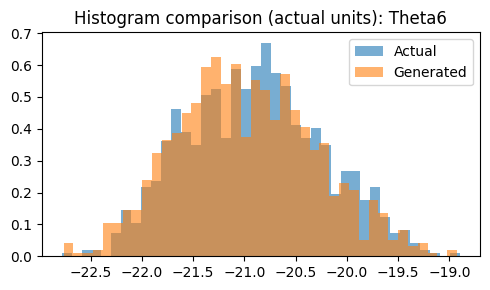

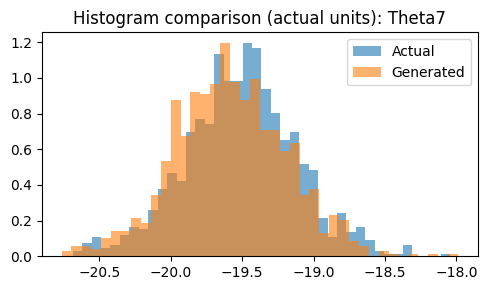

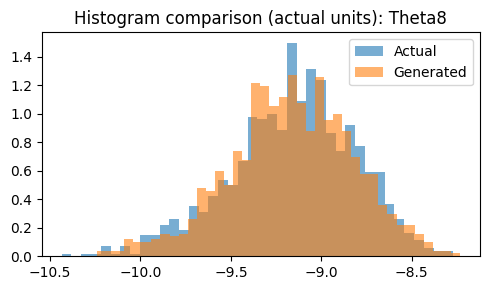

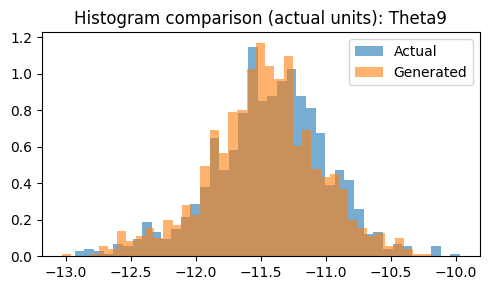

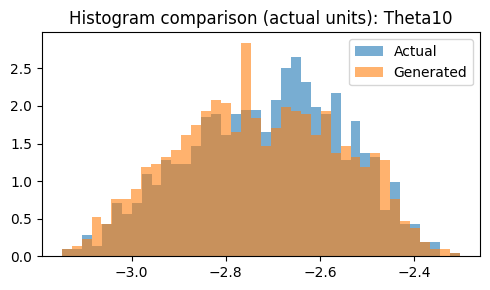

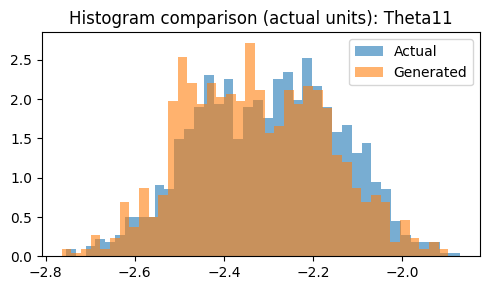

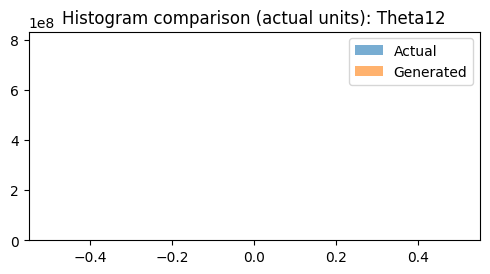

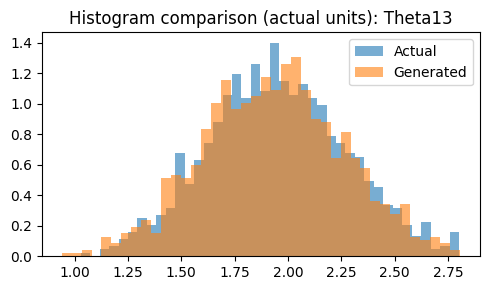

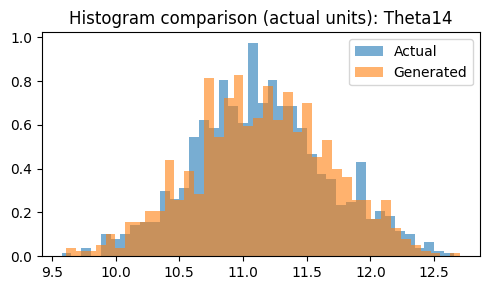

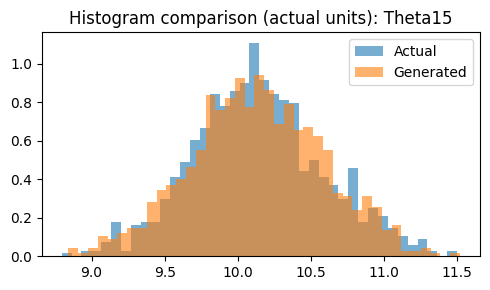

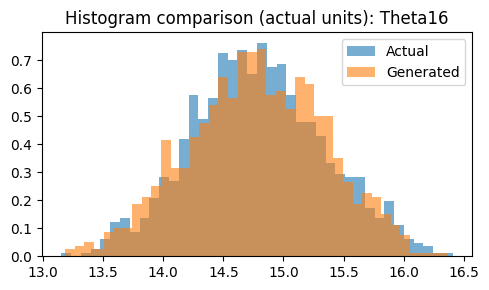

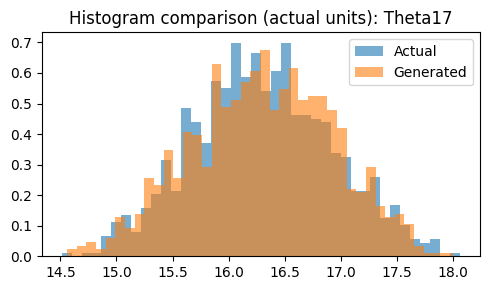

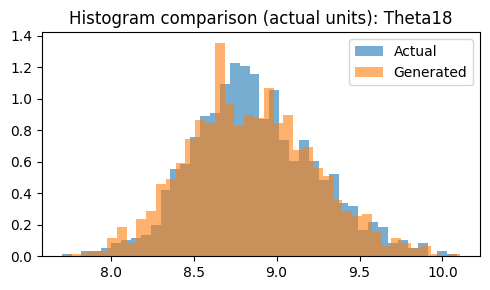

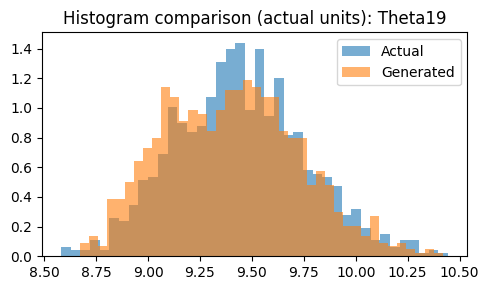

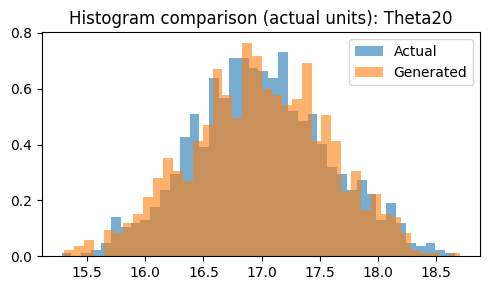

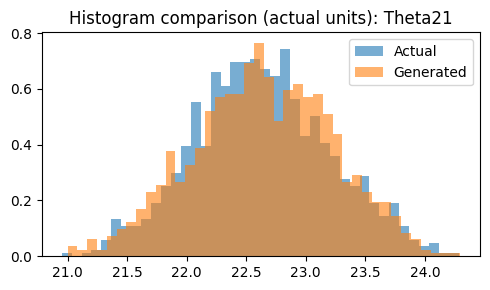

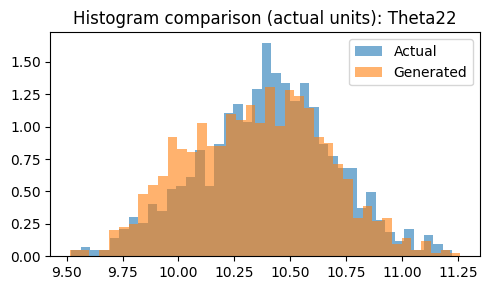

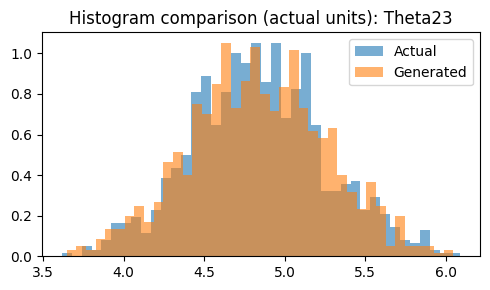

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

BASE_MVA = 100

p_cols = [c for c in actual.columns if c.startswith("P")]
q_cols = [c for c in actual.columns if c.startswith("Q")]
v_cols = [c for c in actual.columns if c.startswith("V")]
theta_cols = [c for c in actual.columns if c.startswith("Th")]

num_buses = len(p_cols)
print(f"\nDetected {num_buses} buses based on column naming (P1...P{num_buses}).")

# -------------------------------
# Convert per-unit → actual values
# -------------------------------
actual_nonpu = actual.copy()
generated_nonpu = generated.copy()

# Convert P and Q (per-unit → MW / Mvar)
for col in p_cols:
    actual_nonpu[col] = actual[col] * BASE_MVA
    generated_nonpu[col] = generated[col] * BASE_MVA

for col in q_cols:
    actual_nonpu[col] = actual[col] * BASE_MVA
    generated_nonpu[col] = generated[col] * BASE_MVA

# Convert V (per-unit → kV)
vn_kv = net.bus.vn_kv.values  # base voltage for each bus
for i, col in enumerate(v_cols):
    actual_nonpu[col] = actual[col] * vn_kv[i]
    generated_nonpu[col] = generated[col] * vn_kv[i]

# Keep θ in degrees (already real-world unit)
# -------------------------------

print("\nConverted per-unit values to actual units (MW / Mvar / kV / degrees)")

# -------------------------------
# Histogram Comparison (actual units)
# -------------------------------
for col in actual_nonpu.columns:
    plt.figure(figsize=(5,3))
    plt.hist(actual_nonpu[col], bins=40, alpha=0.6, density=True, label='Actual')
    plt.hist(generated_nonpu[col], bins=40, alpha=0.6, density=True, label='Generated')
    plt.title(f"Histogram comparison (actual units): {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()
